## **Carga y visualización del dataset:**

In [ ]:
#IMPORTACION DE LIBRERIA
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#CARGA
df = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
#MOSTRAR PRIMERAS FILAS
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Resumen estadístico **básico**

In [ ]:
#RESUMEN ESTADISTICO DE LAS COLUMNAS NUMERICAS
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Análisis de valores **faltantes**

In [ ]:
#IDENTIFICAR LAS COLUMNAS QUE TIENEN VALORES FALTANTES LA CANT. EN CADA UNA
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# **Distribución de tipos de contenido**

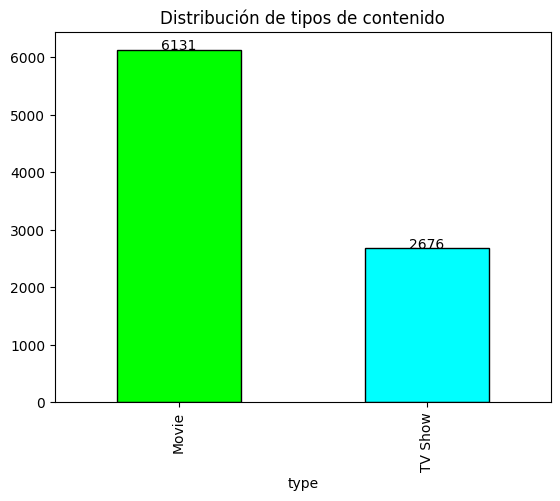

In [ ]:
#MOVIE VS. TV SHOWS
ax = df['type'].value_counts().plot(kind='bar', title='Distribución de tipos de contenido', color=['lime', 'cyan'],edgecolor='black')
#AGREGAR LOS NUMEROS ENCINA DE CADA BARRA
for barra in ax.patches:
    ax.annotate(str(int(barra.get_height())), (barra.get_x() + barra.get_width() / 2., barra.get_height()), ha='center', va='baseline')

plt.show()

# **Análisis del año de lanzamiento**

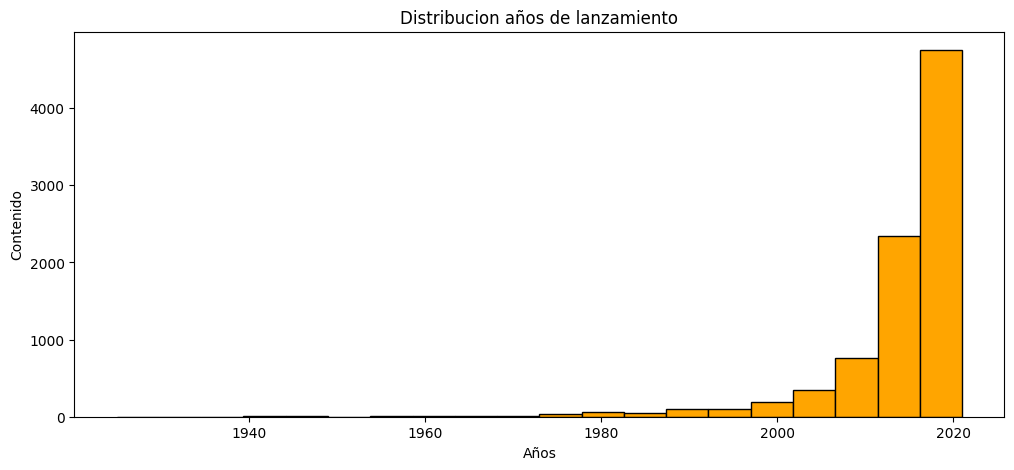

In [ ]:
#HISTOGRAMA

fig, ax = plt.subplots(figsize = (12,5))
ax.hist(df['release_year'], bins = 20, density = False, color = 'orange',edgecolor='black')
ax.set_xlabel('Años')
ax.set_ylabel('Contenido')
ax.set_title('Distribucion años de lanzamiento')

plt.show()

# **Duración del contenido**

In [ ]:
# Asegurarse de que la columna 'duration' es de tipo string
df['duration'] = df['duration'].astype(str)

# Columnas para minutos y temporadas
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
df['duration_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in x or 'Seasons' in x else None)


print(df[['title', 'duration', 'duration_minutes', 'duration_seasons']])

                      title   duration  duration_minutes  duration_seasons
0      Dick Johnson Is Dead     90 min              90.0               NaN
1             Blood & Water  2 Seasons               NaN               2.0
2                 Ganglands   1 Season               NaN               1.0
3     Jailbirds New Orleans   1 Season               NaN               1.0
4              Kota Factory  2 Seasons               NaN               2.0
...                     ...        ...               ...               ...
8802                 Zodiac    158 min             158.0               NaN
8803            Zombie Dumb  2 Seasons               NaN               2.0
8804             Zombieland     88 min              88.0               NaN
8805                   Zoom     88 min              88.0               NaN
8806                 Zubaan    111 min             111.0               NaN

[8807 rows x 4 columns]


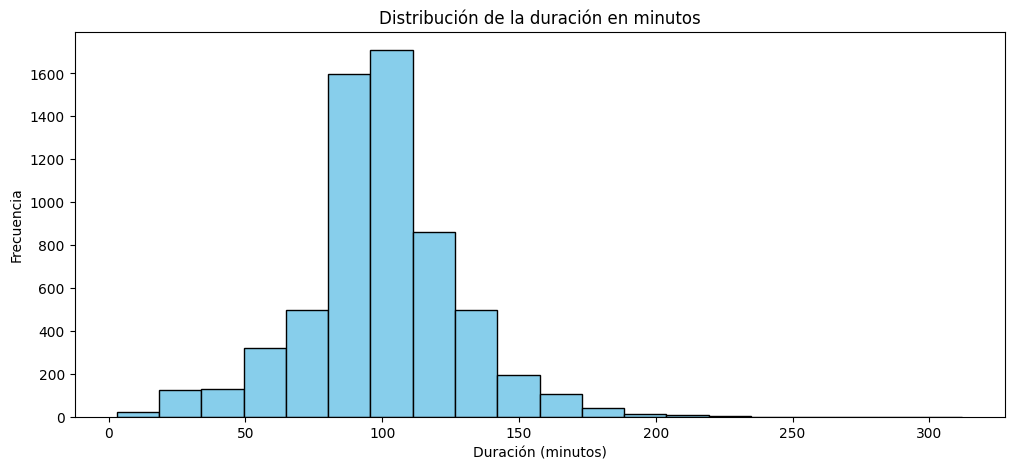

In [ ]:
# Duracion , distribucion por minutos
plt.figure(figsize=(12, 5))
df['duration_minutes'].dropna().plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la duración en minutos')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

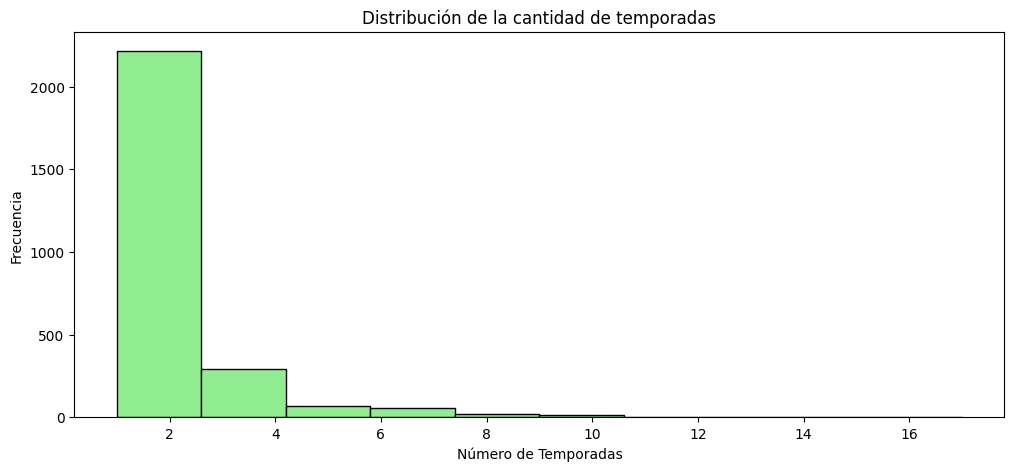

In [ ]:
# Duracion , distribucion por temporadas
plt.figure(figsize=(12, 5))
df['duration_seasons'].dropna().plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribución de la cantidad de temporadas')
plt.xlabel('Número de Temporadas')
plt.ylabel('Frecuencia')
plt.show()

# **Contenido por país**

In [ ]:
print(df[['country', 'listed_in']].head())

         country                                          listed_in
0  United States                                      Documentaries
1   South Africa    International TV Shows, TV Dramas, TV Mysteries
2            NaN  Crime TV Shows, International TV Shows, TV Act...
3            NaN                             Docuseries, Reality TV
4          India  International TV Shows, Romantic TV Shows, TV ...


<ipython-input-41-cd91660c132a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y='count', data=top_countries_df, palette='cubehelix')


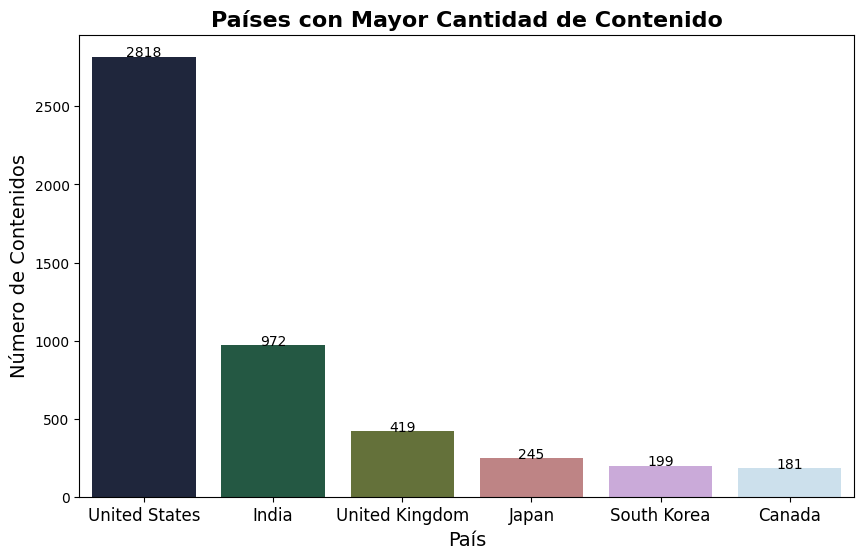

In [41]:
# Gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='count', data=top_countries_df, palette='cubehelix')

plt.title('Países con Mayor Cantidad de Contenido', fontsize=16, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Número de Contenidos', fontsize=14)

plt.xticks(fontsize=12)
for pa in ax.patches:
    ax.annotate(str(int(pa.get_height())), (pa.get_x() + pa.get_width() / 2., pa.get_height()), ha='center', va='baseline')
plt.show()

# Relación entre el año de lanzamiento y la calificación

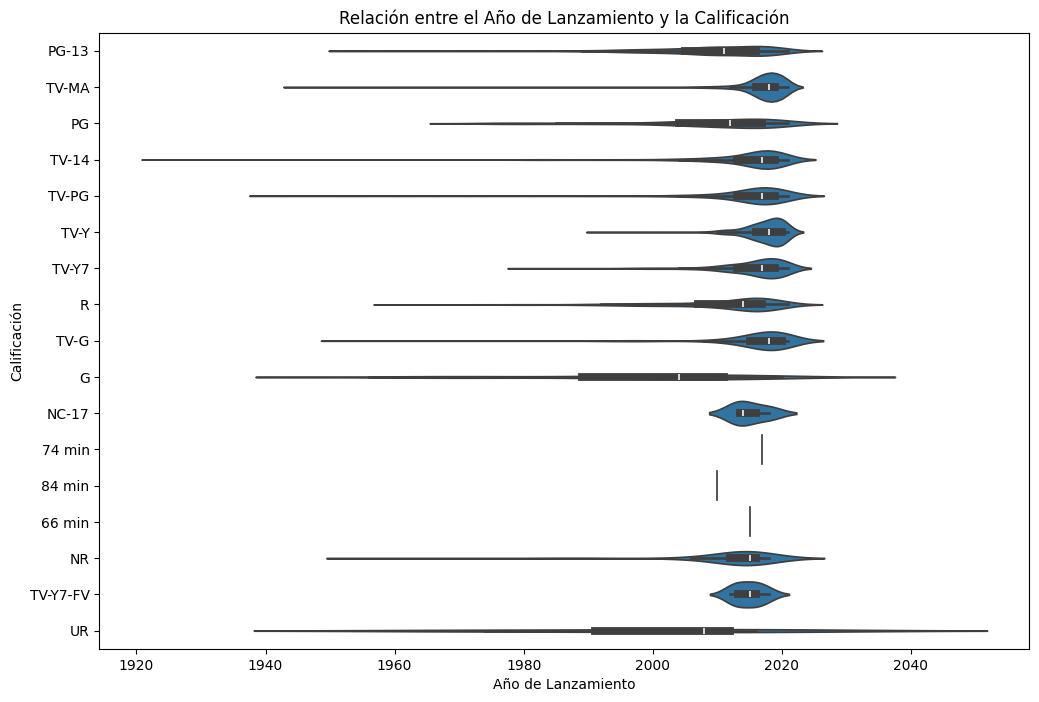

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='release_year', y='rating', data=df)
plt.title('Relación entre el Año de Lanzamiento y la Calificación')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación')

plt.show()


# Análisis de las categorías

<ipython-input-66-21ca8348ffa6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria.index, y=categoria.values, palette='coolwarm')


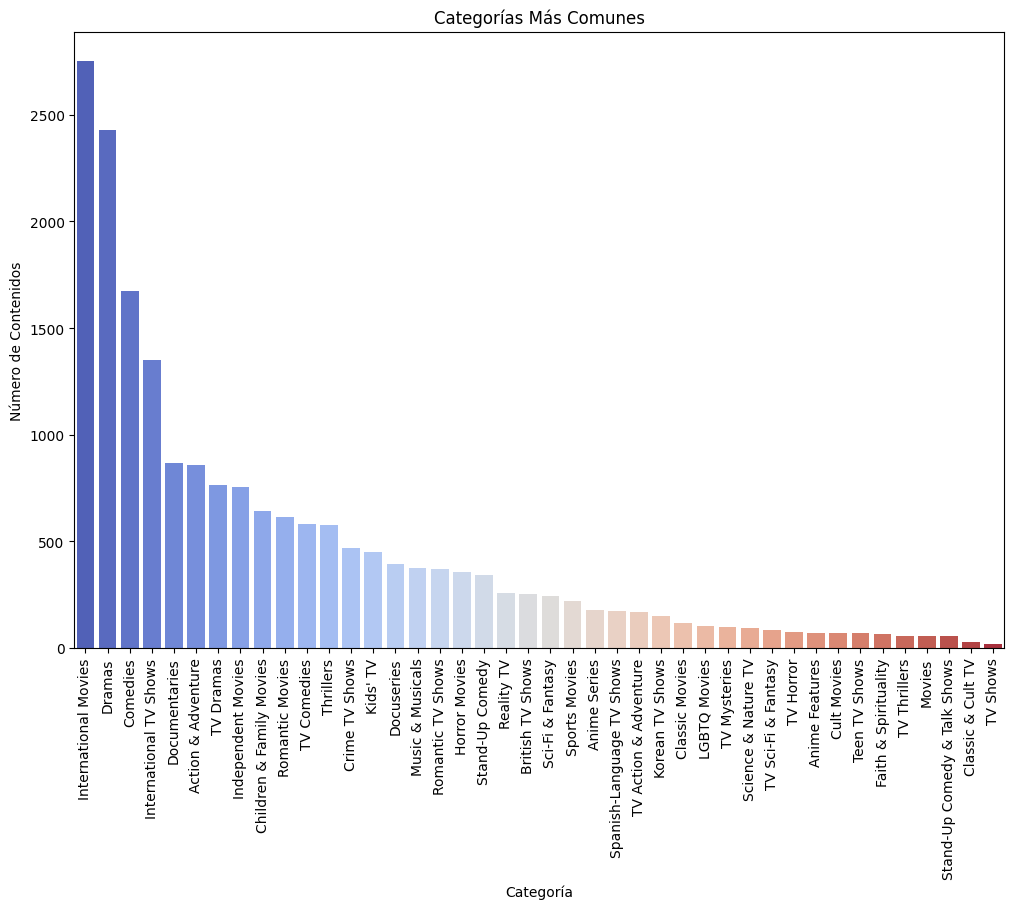

In [ ]:
categoria = df['listed_in'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=categoria.index, y=categoria.values, palette='coolwarm')
plt.title('Categorías Más Comunes')
plt.xlabel('Categoría')
plt.ylabel('Número de Contenidos')
plt.xticks(rotation=90)


plt.show()

# **Análisis de palabras clave en las descripciones**

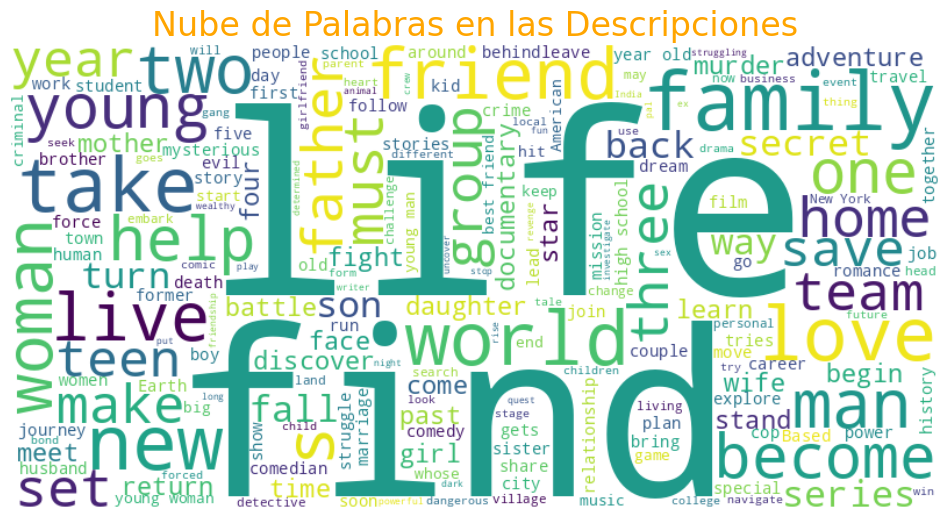

In [ ]:
text = ' '.join(df['description'].dropna())

nube = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en las Descripciones', color = 'orange', fontsize = 24)
plt.show()